**Market Basket analysis**

**1. Import Library**

In [35]:
import pandas as pd


In [36]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**2. Data Collection**

In [37]:
df=pd.read_excel('Online Retail.xlsx')

In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**3. Data Cleaning**

In [40]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [41]:
df.dropna(subset=['CustomerID','Description'], inplace=True)

In [42]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Remove Canceled Orders**

In [43]:
df=df[~df['InvoiceNo'].str.startswith('C', na=False)]

**Keeping Rows With Positive Quantity And Unit Price**

In [44]:
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]

**Reset Index**

In [45]:
df=df.reset_index(drop=True)

In [46]:
df.shape

(397884, 8)

In [47]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**4. Group Transactions Into Baskets**

In [48]:
baskets = df.groupby(['InvoiceNo'])['Description'].apply(list).reset_index()

In [49]:
baskets.head()

,InvoiceNo,Description
0,536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
1,536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
2,536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
3,536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
4,536369,[BATH BUILDING BLOCK WORD]


**5. One Hot Encoding**

In [50]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from mlxtend.preprocessing import TransactionEncoder

# Convert list of lists for TransactionEncoder
transactions = baskets['Description'].tolist()

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)

print(df_encoded.head())

    4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

    DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
0               False                         False   
1               False                         False   
2               False                         False   
3               False                         False   
4               False                         False   

    I LOVE LONDON MINI RUCKSACK   NINE DRAWER OFFICE TIDY  \
0                         False                     False   
1                         False                     False   
2                         False                     False   
3         

**6. Apply Apriori Algorithm**

In [52]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
print(frequent_itemsets.sort_values(by='support', ascending=False))

      support                              itemsets
192  0.106357  (WHITE HANGING HEART T-LIGHT HOLDER)
154  0.091895            (REGENCY CAKESTAND 3 TIER)
81   0.086337             (JUMBO BAG RED RETROSPOT)
124  0.074412                       (PARTY BUNTING)
11   0.074196       (ASSORTED COLOUR BIRD ORNAMENT)
..        ...                                   ...
121  0.020181              (PAPER CHAIN KIT EMPIRE)
197  0.020127   (WOOD S/3 CABINET ANT WHITE FINISH)
55   0.020019          (HAND WARMER RED LOVE HEART)
125  0.020019                   (PARTY METAL SIGN )
140  0.020019    (POTTERING IN THE SHED METAL SIGN)

[243 rows x 2 columns]


In [53]:
print(frequent_itemsets.head())

    support                           itemsets
0  0.021692         (3 STRIPEY MICE FELTCRAFT)
1  0.039175           (6 RIBBONS RUSTIC CHARM)
2  0.025146  (60 CAKE CASES VINTAGE CHRISTMAS)
3  0.035452      (60 TEATIME FAIRY CAKE CASES)
4  0.027034   (72 SWEETHEART FAIRY CAKE CASES)


**7. Generate Association Rule**

In [54]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                          antecedents  \
0                        (ALARM CLOCK BAKELIKE GREEN)   
1                         (ALARM CLOCK BAKELIKE RED )   
2                         (ALARM CLOCK BAKELIKE PINK)   
3                         (ALARM CLOCK BAKELIKE RED )   
4                              (DOLLY GIRL LUNCH BOX)   
..                                                ...   
71  (ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...   
72  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
73                 (ROSES REGENCY TEACUP AND SAUCER )   
74                   (PINK REGENCY TEACUP AND SAUCER)   
75                  (GREEN REGENCY TEACUP AND SAUCER)   

                                          consequents   support  confidence  \
0                         (ALARM CLOCK BAKELIKE RED )  0.028599    0.671736   
1                        (ALARM CLOCK BAKELIKE GREEN)  0.028599    0.604333   
2                         (ALARM CLOCK BAKELIKE RED )  0.021368    0.646003   

In [55]:
print(rules.head())

                    antecedents                   consequents  \
0  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE RED )   
1   (ALARM CLOCK BAKELIKE RED )  (ALARM CLOCK BAKELIKE GREEN)   
2   (ALARM CLOCK BAKELIKE PINK)   (ALARM CLOCK BAKELIKE RED )   
3   (ALARM CLOCK BAKELIKE RED )   (ALARM CLOCK BAKELIKE PINK)   
4        (DOLLY GIRL LUNCH BOX)         (SPACEBOY LUNCH BOX )   

   antecedent support  consequent support   support  confidence       lift  \
0            0.042575            0.047324  0.028599    0.671736  14.194548   
1            0.047324            0.042575  0.028599    0.604333  14.194548   
2            0.033078            0.047324  0.021368    0.646003  13.650778   
3            0.047324            0.033078  0.021368    0.451539  13.650778   
4            0.033240            0.037988  0.022879    0.688312  18.119023   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.026584    2.902169       0.970886  0

**8. Visualize**

In [56]:
pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


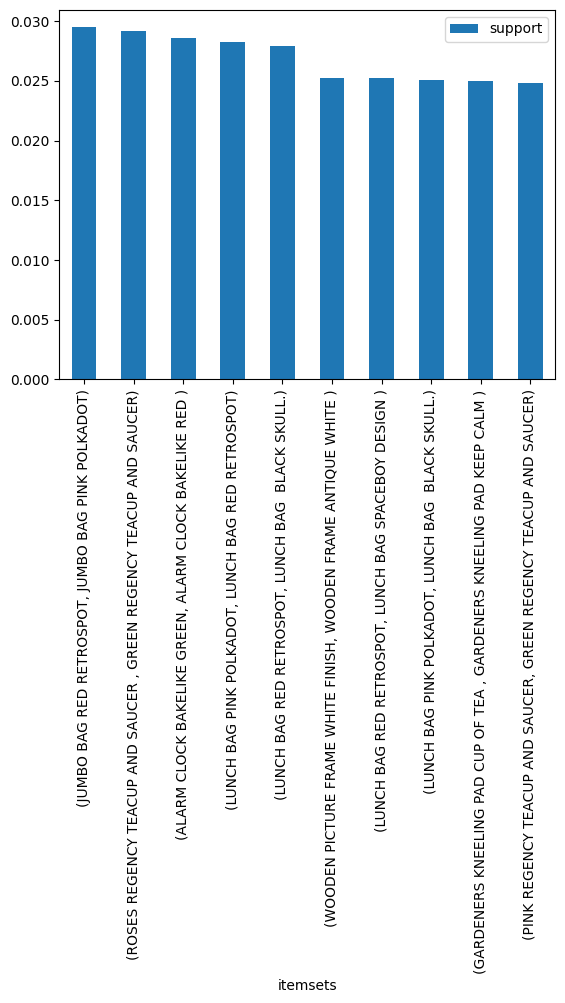

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Top 10 Frequent Itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets['length'] > 1].nlargest(10, 'support').plot(kind='bar', x='itemsets', y='support')
plt.show()

In [58]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [59]:
# Convert itemsets from frozenset or tuple to clean text
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

In [60]:
frequent_itemsets.head()

,support,itemsets,length
0,0.021692,3 STRIPEY MICE FELTCRAFT,1
1,0.039175,6 RIBBONS RUSTIC CHARM,1
2,0.025146,60 CAKE CASES VINTAGE CHRISTMAS,1
3,0.035452,60 TEATIME FAIRY CAKE CASES,1
4,0.027034,72 SWEETHEART FAIRY CAKE CASES,1


In [61]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

In [62]:
frequent_itemsets.to_csv("frequent_itemsets.csv", index=False)

In [63]:
rules.to_csv("association_rules.csv", index=False)